In [8]:
import torch
import numpy as np

import matplotlib.pyplot as plt

In [5]:
from torchvision import datasets, transforms

# Prepare data

In [6]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                               ])

# Download and load the training data
trainset = datasets.MNIST("MNIST_data/", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Processing...
Done!


In [7]:
dataiter = iter(trainloader)

images, labels = dataiter.next()

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


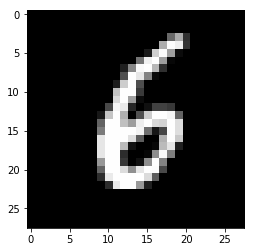

In [11]:
plt.imshow(images[1].numpy().squeeze(), cmap="gray")

In [35]:
def activation(x):
    return 1/(1 + torch.exp(-x))

features = images.view((images.shape[0], -1))

n_input = features.shape[1]
n_hidden  = 256
n_output = 10

W1 = torch.randn(n_input, n_hidden)
B1 = torch.randn(n_hidden)

W2 = torch.randn(n_hidden, n_output)
B2 = torch.randn(n_output)

H1 = activation(torch.mm(features, W1) + B1)
H2 = torch.mm(H1, W2) + B2

In [72]:
H1.shape, H2.shape

(torch.Size([64, 256]), torch.Size([64, 10]))

In [73]:
def softmax(x):
    return torch.exp(x) / torch.sum(torch.exp(x), dim=1).view(-1, 1)

In [74]:
out = softmax(H2)

In [75]:
out.shape

torch.Size([64, 10])

In [76]:
print(out.sum(dim=1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


# Building networks with PyTorch

In [77]:
from torch import nn

In [78]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # define transformations
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
        # define activations
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # pass input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [79]:
model = Network()

In [80]:
print(model)

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)


uses common operations in `torch.nn.functional as F`

In [82]:
import torch.nn.functional as F

In [83]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # define transformations
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
                
    def forward(self, x):
        # pass input tensor through each of our operations
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x))
        
        return x

In [84]:
model = Network()
print(model)

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)


# Build a full network

In [90]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # define transformations
        self.hidden_1 = nn.Linear(784, 128)
        self.hidden_2 = nn.Linear(128, 64)        
        self.output = nn.Linear(64, 10)
                
    def forward(self, x):
        # pass input tensor through each of our operations
        x = F.relu(self.hidden_1(x))
        x = F.relu(self.hidden_2(x))
        x = F.softmax(self.output(x))
        
        return x

In [91]:
model = Network()
print(model)

Network(
  (hidden_1): Linear(in_features=784, out_features=128, bias=True)
  (hidden_2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)
